In [1]:
# Reference : https://github.com/erinnil/Sign-Language-MNIST-Neural-Network-Classifier.git
# Libraries 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [2]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')
# Load the testing dataset
test_data = pd.read_csv('../archive/sign_mnist_test.csv')
print("First five rows of the training dataset")
train_data.head()

First five rows of the training dataset


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Separate the data (features) and the classes
X_test = test_data.drop(['label'], axis=1)  # Features (all columns except the first one)
X_test = X_test / 255.0
y_test = test_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_train   # ← MUST HAVE THIS
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_validate.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 21964 samples
Validation set size: 5491 samples
Testing set size: 7172 samples


In [4]:
max_iters = [20, 50, 100, 200, 300, 400, 500]

train_acc_list = []
val_acc_list = []
final_loss_list = []

for m in max_iters:
    model = MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate_init=0.0001,
        random_state=42,
        max_iter=m
    )
    model.fit(X_train, y_train)

    train_acc_list.append(model.score(X_train, y_train))
    val_acc_list.append(model.score(X_validate, y_validate))
    final_loss_list.append(model.loss_curve_[-1])


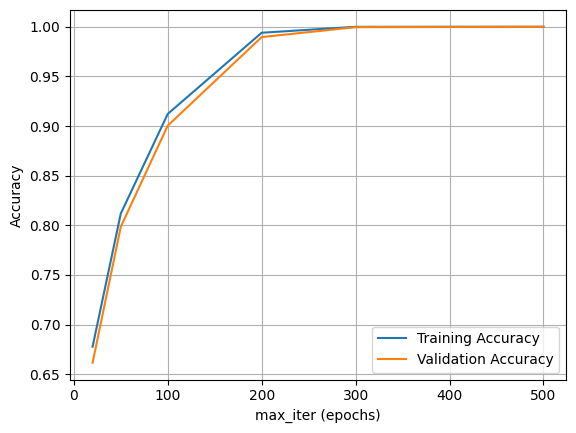

In [5]:
plt.plot(max_iters, train_acc_list, label="Training Accuracy")
plt.plot(max_iters, val_acc_list, label="Validation Accuracy")
plt.xlabel("max_iter (epochs)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


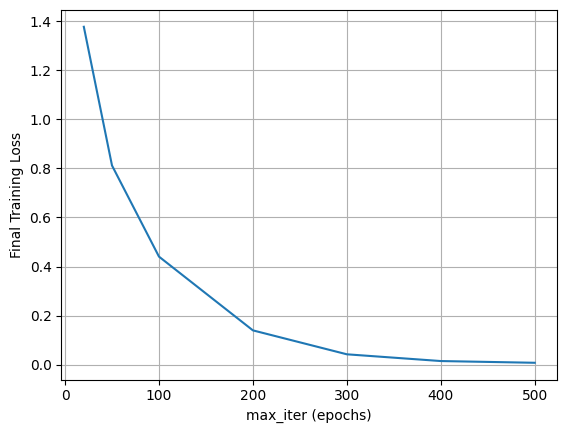

In [6]:
plt.plot(max_iters, final_loss_list)
plt.xlabel("max_iter (epochs)")
plt.ylabel("Final Training Loss")
plt.grid()
plt.show()
